In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [26]:
df= pd.read_csv("superstore.csv", encoding='latin-1')
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_ name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [27]:
y=df.groupby('segment').count()['order_id']

In [28]:
z=y.map(lambda x: x/y.sum()) #--> lambda for the percentage
z

segment
Consumer       0.517021
Corporate      0.300819
Home Office    0.182160
Name: order_id, dtype: float64

In [29]:
poppo=pd.DataFrame({"count": y, "percentage": z}) # new df with the z and y
poppo

,count,percentage
segment,,
Consumer,26518,0.517021
Corporate,15429,0.300819
Home Office,9343,0.182160


Text(0.5, 1.0, 'Segment Distribution - %')

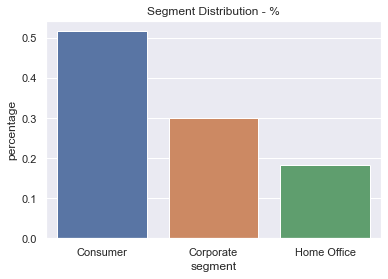

In [30]:
segment_distribution_per=sns.barplot(data=poppo.reset_index(), y='percentage', x='segment')  #reset the index as a column
segment_distribution_per.set_title('Segment Distribution - %')

In [31]:
df['profit_rate']= (df['profit']/df['sales'])*100

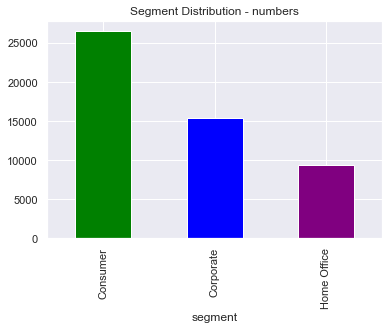

In [32]:
y.plot.bar(color=['green', 'blue', 'purple'])
plt.title('Segment Distribution - numbers')
plt.show()

In [33]:
profit_by_segment= df.groupby('segment').mean()['profit_rate']
profit_by_segment

segment
Consumer       4.644563
Corporate      4.582963
Home Office    5.286456
Name: profit_rate, dtype: float64

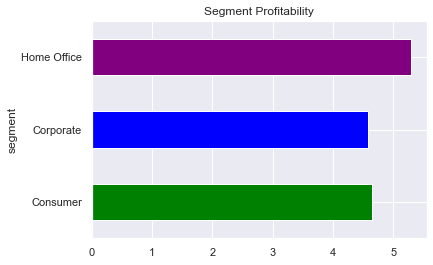

In [64]:
profit_by_segment.plot.barh(color=['green', 'blue', 'purple'])
plt.title('Segment Profitability')
plt.show()


In [35]:
c=df.groupby('country').max()['profit_rate']
c

country
Afghanistan    46.958982
Albania        48.996450
Algeria        50.000000
Angola         49.950739
Argentina      16.666667
                 ...    
Venezuela      16.613007
Vietnam        39.694469
Yemen         -76.746367
Zambia         50.000000
Zimbabwe      -67.770419
Name: profit_rate, Length: 147, dtype: float64

In [36]:
sales_by_segment= df.groupby('segment').mean()['sales']

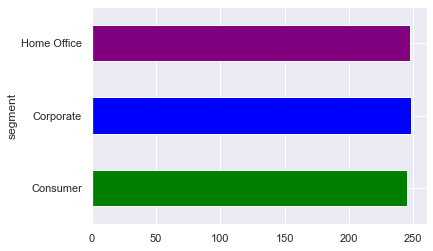

In [37]:
sales_by_segment.plot.barh(color=['green', 'blue', 'purple'])

In [38]:
According to the customer distribution, the greater amount of transaction are done by the segment
customer but the higher profit are driven by homeoffice.

SyntaxError: invalid syntax (<ipython-input-38-40c0bdcaa505>, line 1)

In [ ]:
subcategory_drivers= df.groupby('category').mean()['profit_rate']
subcategory_drivers

AttributeError: 'PathCollection' object has no property 'col'

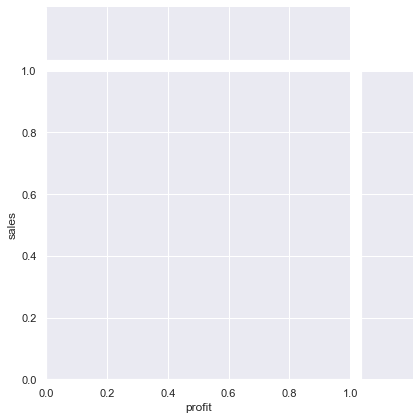

In [74]:
sns.jointplot(data=df, x="profit", y="sales", col="category", sharex=False, sharey=False, col_wrap=3)
plt.legend()

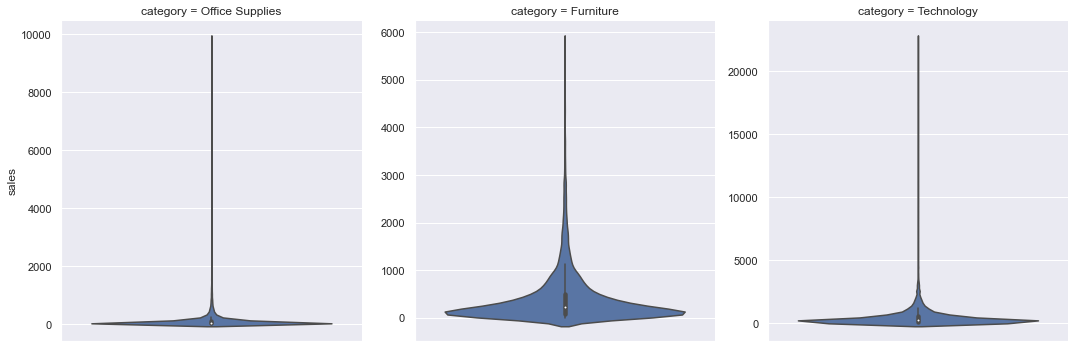

In [73]:
sns.catplot(data=df, y='sales', col='category', kind='violin', sharex=False, sharey=False, col_wrap=4)

In [ ]:
sns.jointplot

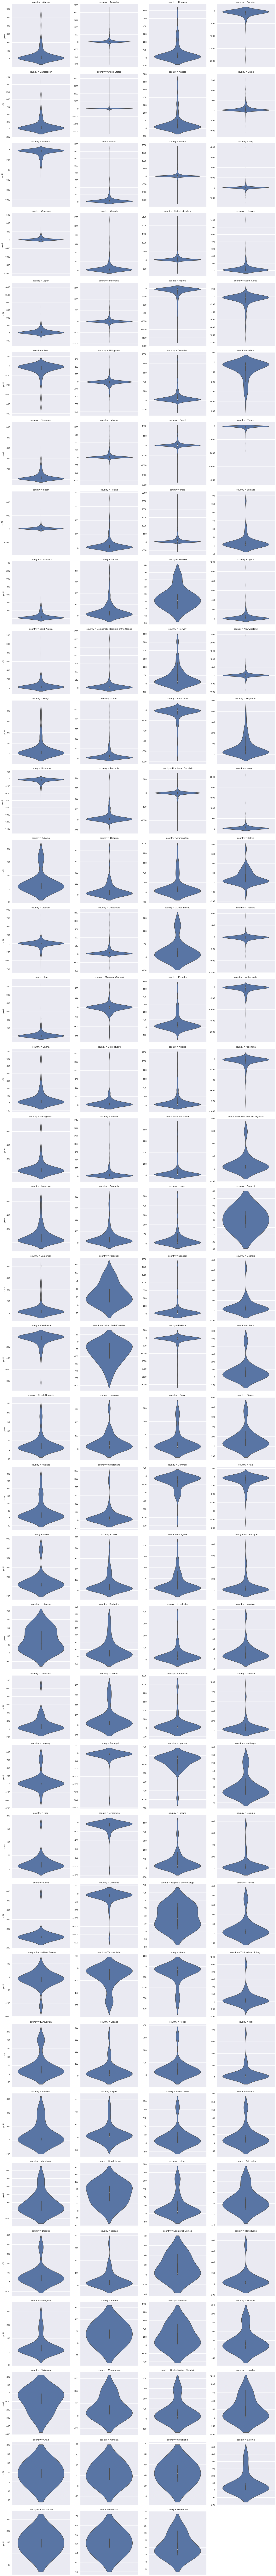

In [72]:
sns.catplot(data=df, y='profit', col='country', kind='violin', sharex=False, sharey=False, col_wrap=4)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

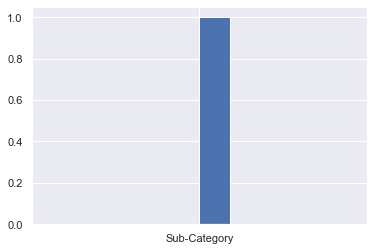

In [41]:
plt.hist(data=df,x='Sub-Category',bins=10)

In [58]:
sales_by_category= (df.groupby('sub-category').mean()['profit'], ascending=False)
df.sort_values(['job','count'],ascending=False).groupby('job').head(3)
sales_by_category.sort_values()

SyntaxError: invalid syntax (<ipython-input-58-46bc79b09f02>, line 1)

In [59]:
sales_by_category.plot.bar

AttributeError: 'bool' object has no attribute 'plot'

In [55]:
plt.barh(sales_by_category.index, sales_by_category.values, width=0.5)



TypeError: barh() got multiple values for argument 'width'

In [61]:
sales_by_category.plt.yticks()

AttributeError: 'bool' object has no attribute 'plt'

In [63]:
)

AttributeError: 'bool' object has no attribute 'plt'

TypeError: strptime() argument 1 must be str, not Series